In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [226]:
df = pd.read_csv(r'C:\Users\Pavlina\Desktop\POC\DJIA_table.csv')

In [227]:
import statsmodels.api as sm

In [228]:
df.set_index('Date', inplace=True)

In [229]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [230]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Open,1989.0,1.345912e+04,3.143282e+03,6.547010e+03,1.090734e+04,1.302205e+04,1.647770e+04,1.831506e+04
High,1989.0,1.354130e+04,3.136272e+03,6.709610e+03,1.100098e+04,1.308811e+04,1.655007e+04,1.835136e+04
Low,1989.0,1.337293e+04,3.150421e+03,6.469950e+03,1.082476e+04,1.295313e+04,1.639277e+04,1.827256e+04
Close,1989.0,1.346303e+04,3.144007e+03,6.547050e+03,1.091338e+04,1.302558e+04,1.647841e+04,1.831239e+04
Volume,1989.0,1.628110e+08,9.392343e+07,8.410000e+06,1.000000e+08,1.351700e+08,1.926000e+08,6.749200e+08
Adj Close,1989.0,1.346303e+04,3.144007e+03,6.547050e+03,1.091338e+04,1.302558e+04,1.647841e+04,1.831239e+04


Text(0, 0.5, 'Open value')

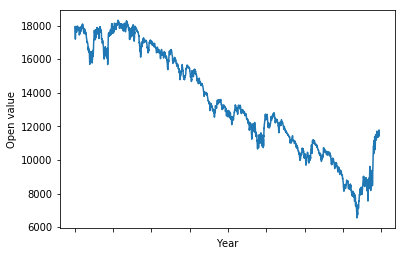

In [231]:
df['Open'].plot()
plt.xlabel('Year')
plt.ylabel('Open value')



In [233]:
time_series=df['Open']

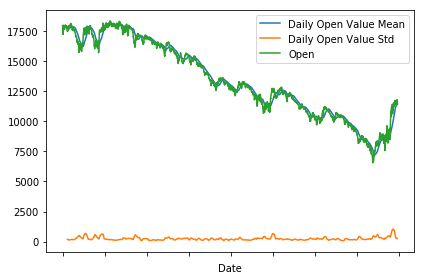

In [234]:
#Monthly time series visualisation of Open value
time_series.rolling(30).mean().plot(label='Daily Open Value Mean')
time_series.rolling(30).std().plot(label='Daily Open Value Std')
time_series.plot()
plt.legend()
plt.tight_layout()


In [237]:
#Stationarity test using augmented Dickey-Fuller t-test

In [238]:
from statsmodels.tsa.stattools import adfuller

In [239]:
result = adfuller(df['Open'])

In [240]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3154847743115958
p-value : 0.6220585722348055
#Lags Used : 20
Number of Observations Used : 1968
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [241]:

def adf_check(time_series):
    
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [242]:
#Autocorrelation

In [243]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

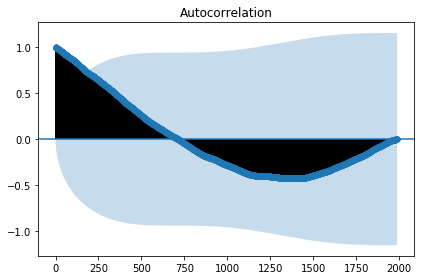

In [244]:
fig_first = plot_acf(df["Open"].dropna())
plt.tight_layout()

In [245]:
df['First Difference'] = df['Open'] - df['Open'].shift(1)

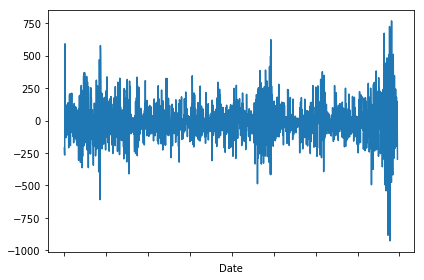

In [246]:
df['First Difference'].plot()
plt.tight_layout()

In [247]:
adf_check(df['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.088996319164867
p-value : 1.1352747575944598e-17
#Lags Used : 19
Number of Observations Used : 1968
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [248]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [249]:
#Partial-autocorrelation PACF

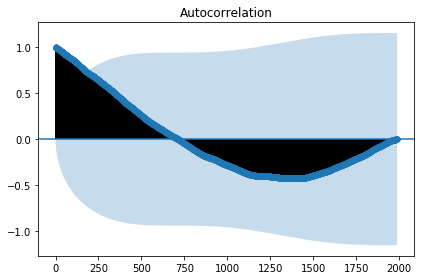

In [250]:
fig_first = plot_acf(df["Open"].dropna())
plt.tight_layout()